In [28]:
#%matplotlib qt

In [29]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from knn import KNN

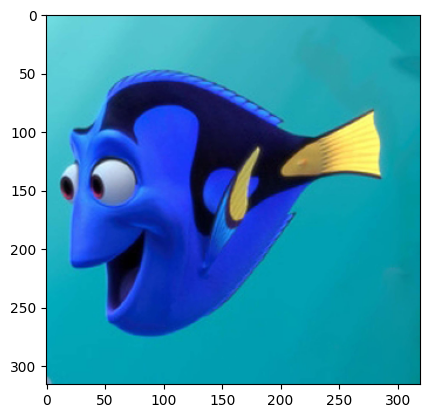

In [30]:
dory = cv2.imread("dor4.jpg")
dory = cv2.cvtColor(dory , cv2.COLOR_BGR2RGB)
dory = cv2.resize(dory , (0,0) , fx=0.2 , fy=0.2)

plt.imshow(dory)
plt.show()

# create dataset from pixels

In [31]:
pixels_list = dory.reshape(-1 , 3) #tedade sotoon ha 3 tast (RGB), tedade satr ha ro nemidoonim pas -1 mizarim 
pixels_list.shape
# number of data = 569490 , with 3 feature for each pixel

(101120, 3)

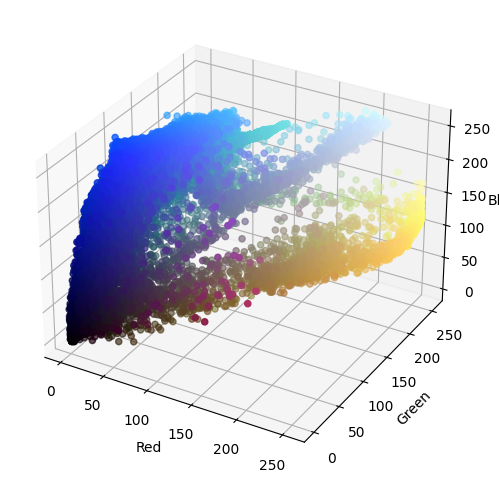

In [32]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

# pixels_list[: , 0] = green values 
# pixels_list[: , 1] = blue values 
# pixels_list[: , 2] = red values 
# c=pixels_list / 255 = each pixels show as it's own color
ax.scatter(pixels_list[: , 0] , pixels_list[: , 1] , pixels_list[: ,2 ] , c=pixels_list / 255 , marker= "o")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue" )
plt.show()


In [33]:
dory_hsv = cv2.cvtColor(dory , cv2.COLOR_RGB2HSV)
dory.shape

(316, 320, 3)

In [34]:
pixels_list_hsv = dory_hsv.reshape(-1 ,3)
pixels_list_hsv

array([[ 91, 124, 228],
       [ 91, 124, 228],
       [ 91, 125, 226],
       ...,
       [ 92, 253, 146],
       [ 93, 248, 150],
       [ 93, 252, 152]], dtype=uint8)

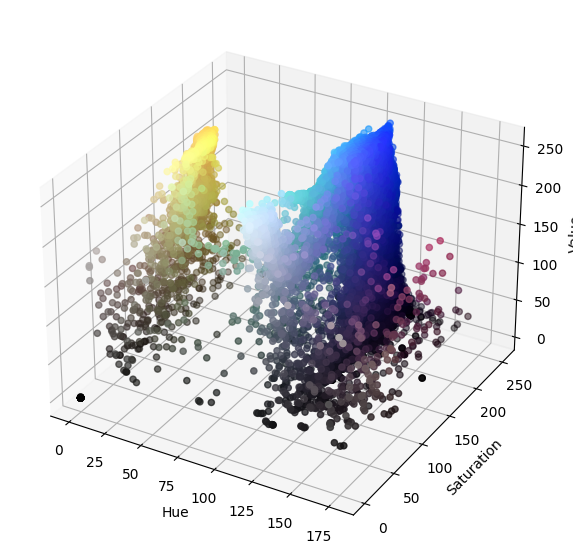

In [35]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(pixels_list_hsv[: , 0] , pixels_list_hsv[: , 1] , pixels_list_hsv[: ,2 ] , c=pixels_list / 255)
ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value" )
plt.show()

# Create MASK for blue parts

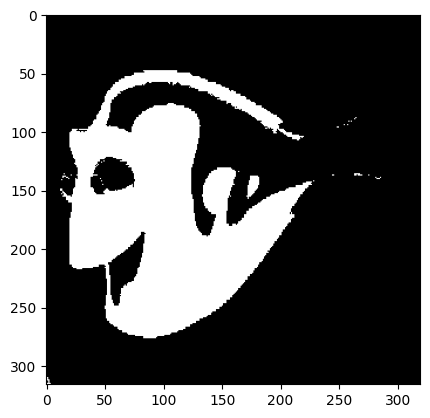

In [36]:
# Create MASK 
dark_blue = (100, 70, 90)
light_blue = (190, 255, 255)
blue_mask = cv2.inRange(dory_hsv,dark_blue , light_blue ) 
plt.imshow(blue_mask , cmap="gray")

# create MASK for white parts 

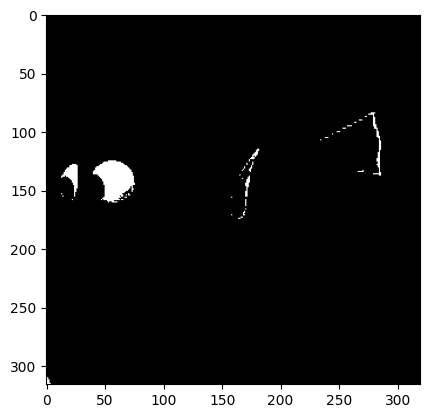

In [37]:
dark_white = (0,0,168)
light_white = (172,111,255)

white_mask = cv2.inRange(dory_hsv , dark_white ,light_white  )
plt.imshow(white_mask , cmap="gray")

# create mask for black parts :

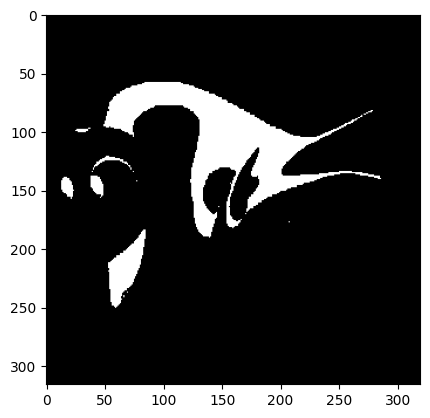

In [38]:
dark_blacks = (0 , 0 , 0)
light_blacks = (300,290,110)
black_mask = cv2.inRange(dory_hsv ,dark_blacks , light_blacks )
#black_mask = cv2.bitwise_not(black_mask)
plt.imshow(black_mask , cmap="gray")

# create mask for yellow parts :

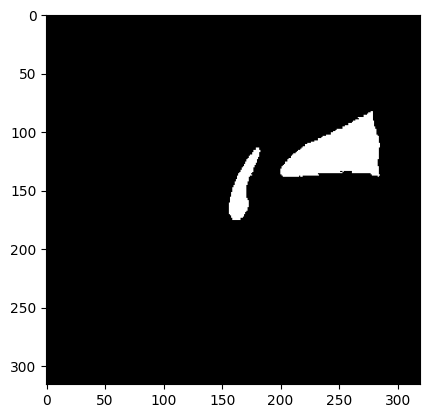

In [39]:
dark_blacks = (10, 30, 50)
light_blacks = (35, 255, 255)
yellow_mask = cv2.inRange(dory_hsv ,dark_blacks , light_blacks )
#yellow_mask = cv2.bitwise_not(yellow_mask)
plt.imshow(yellow_mask , cmap="gray")

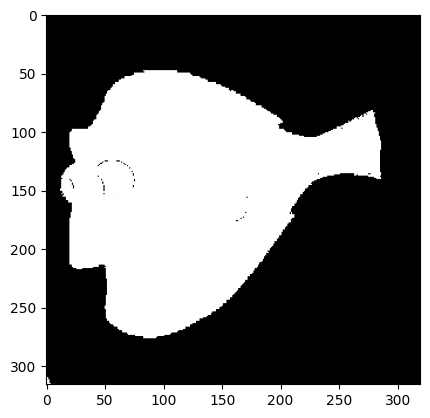

In [40]:
final_mask =  blue_mask + white_mask +black_mask + yellow_mask
plt.imshow(final_mask , cmap="gray")

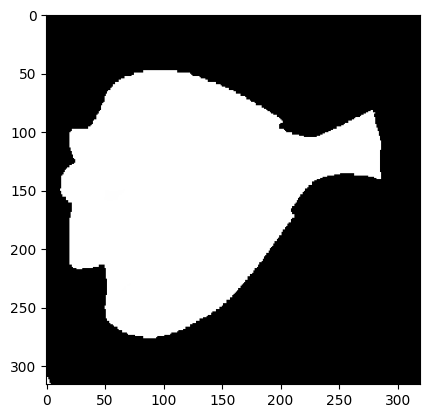

In [41]:
kernel = np.ones((3, 3), np.uint8)
image = cv2.dilate(final_mask , kernel, cv2.BORDER_TRANSPARENT) 
image = cv2.erode(image , kernel, cv2.BORDER_TRANSPARENT) 

plt.imshow(image , cmap="gray" )


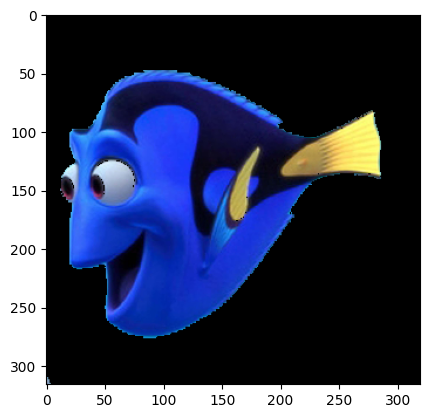

In [42]:
final_result = cv2.bitwise_and(dory, dory, mask=final_mask)
plt.imshow(final_result , cmap="gray")

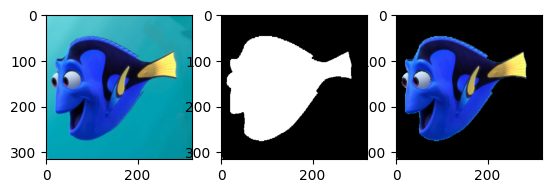

In [43]:
plt.subplot(1, 3, 1)
plt.imshow(dory, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(image, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.show()

# Training :

### consider "pixels_list_hsv" as train dataset

### normalize our data by dividing into 255 :

In [44]:
x_train = pixels_list_hsv / 255 
x_train.shape
# 3 means = hue , sat , value numbers

(101120, 3)

## consider final mask as labels :

### consider dory pixels as 1 label 
### consider image-background as 0 label ( NOT dory )

In [45]:
final_mask.shape 
# its not like dataset , but looks like an image , so we resahpe it in next line 

(316, 320)

In [46]:
# 1 = label  hast . dory / or not dory 
y_train = final_mask.reshape(-1 ,) // 255     
y_train.shape

(101120,)

In [47]:
knn = KNN(3)
knn.fit(x_train , y_train)

# prediction for new images : 

(86, 146, 3)

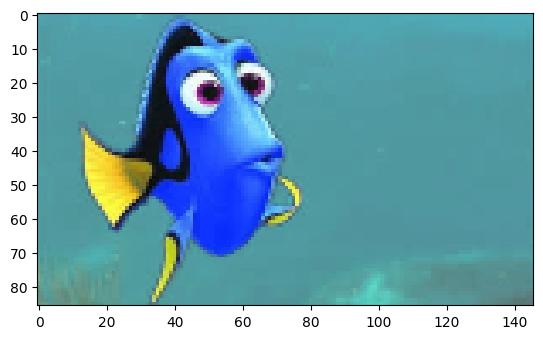

In [66]:
dashe_dory = cv2.imread("dor7.JPG")
dashe_dory = cv2.resize(dashe_dory , (0,0) , fx=0.5 , fy=0.5)
dashe_dory = cv2.cvtColor(dashe_dory , cv2.COLOR_BGR2RGB)
dashe_dory_hsv = cv2.cvtColor(dashe_dory , cv2.COLOR_RGB2HSV)
plt.imshow(dashe_dory, cmap="gray")
dashe_dory_hsv.shape
# its shape is a picture format shape , we should convert it to dataset type

In [67]:
x_test  = dashe_dory_hsv.reshape(-1,3) / 255 
x_test = np.array(x_test)
print(x_test.shape)

(12556, 3)


In [68]:
Y_pred_bro = knn.predict(x_test)

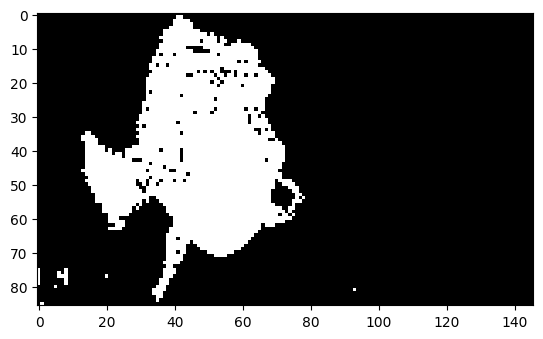

In [69]:
Y_pred_bro = np.array(Y_pred_bro)
output1 = Y_pred_bro.reshape(dashe_dory_hsv.shape[:2])
plt.imshow(output1 , cmap="gray")

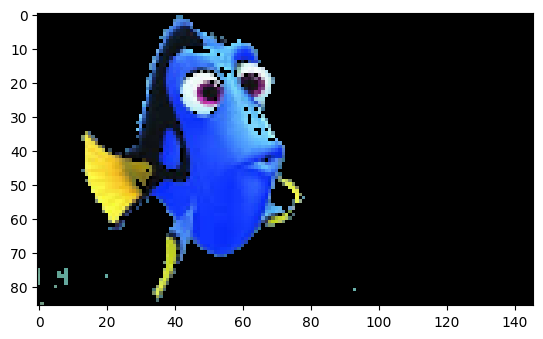

In [70]:
output1 = output1.astype("uint8")
final_result1 = cv2.bitwise_and(dashe_dory , dashe_dory , mask=output1)
plt.imshow(final_result1 , cmap="gray")

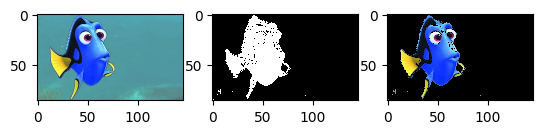

In [71]:
plt.subplot(1, 3, 1)
plt.imshow(dashe_dory, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(output1, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result1)
plt.show()

# prediction for dory's sister :

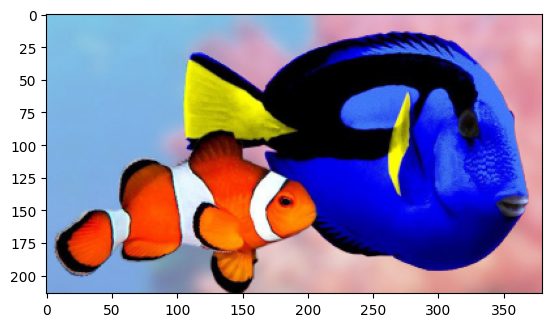

In [72]:
abjie_dory = cv2.imread("dor_nemo.jpg")
abjie_dory = cv2.resize(abjie_dory , (0,0) , fx=0.5 , fy=0.5)
abjie_dory = cv2.cvtColor(abjie_dory , cv2.COLOR_BGR2RGB)
plt.imshow(abjie_dory)

In [ ]:
abjie_dory_hsv = cv2.cvtColor(abjie_dory , cv2.COLOR_RGB2HSV)
x_test = abjie_dory_hsv.reshape(-1,3) /255
x_test = np.array(x_test)

Y_pred_sis = knn.predict(x_test)

In [ ]:
Y_pred_sis = np.array(Y_pred_sis)
output2 = Y_pred_sis.reshape(abjie_dory_hsv.shape[:2])
plt.imshow(output2 , cmap="gray")

In [ ]:
output2 = output2.astype("uint8")
final_result2 = cv2.bitwise_and(abjie_dory , abjie_dory , mask=output2)
plt.imshow(final_result2 , cmap="gray")

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(abjie_dory, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(output2, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result2)
plt.show()